# Dataset Information
## Boston House Prices Dataset was collected in 1978 and has 506 entries with 14 attributes or features for homes from various suburbs in Boston.

# Boston Housing Dataset Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

## Importing necessary modules

In [22]:
#for dataframe operations
import pandas as pd
#for numerical operations
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#for ignoring any warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset 

In [23]:
df = pd.read_csv(r'E:\Data Analysis Projects/HousingData.csv')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [24]:
# For getting statistical information
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Preprocessing the dataset

In [25]:
#Checking for the null values in the data set
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
#There are no null values in the data set. We are good to go!

# Exploratory Dataset

### In this section, we will use some visualizations to understand the relationship of the target variable with other features.

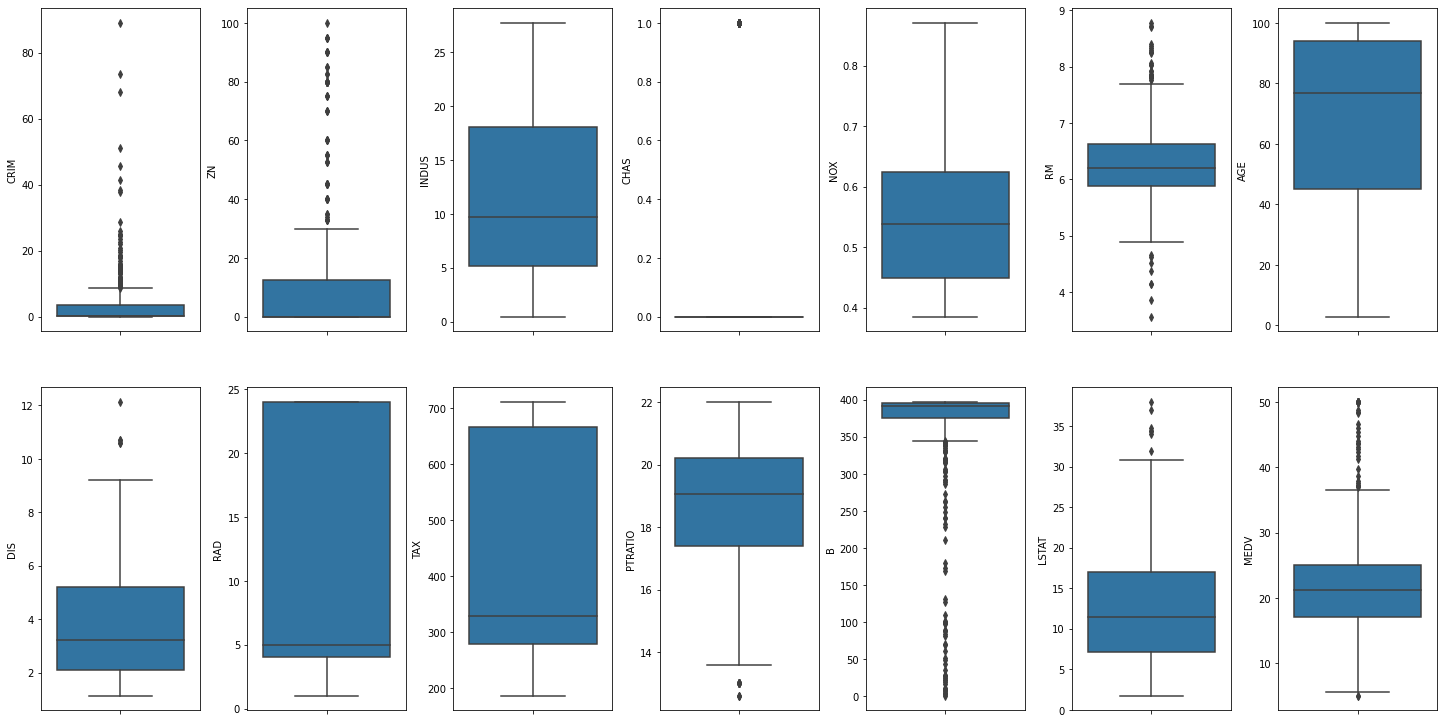

In [27]:
# Create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
# For hyperparameter tuning to avoid overlapping in the graph
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

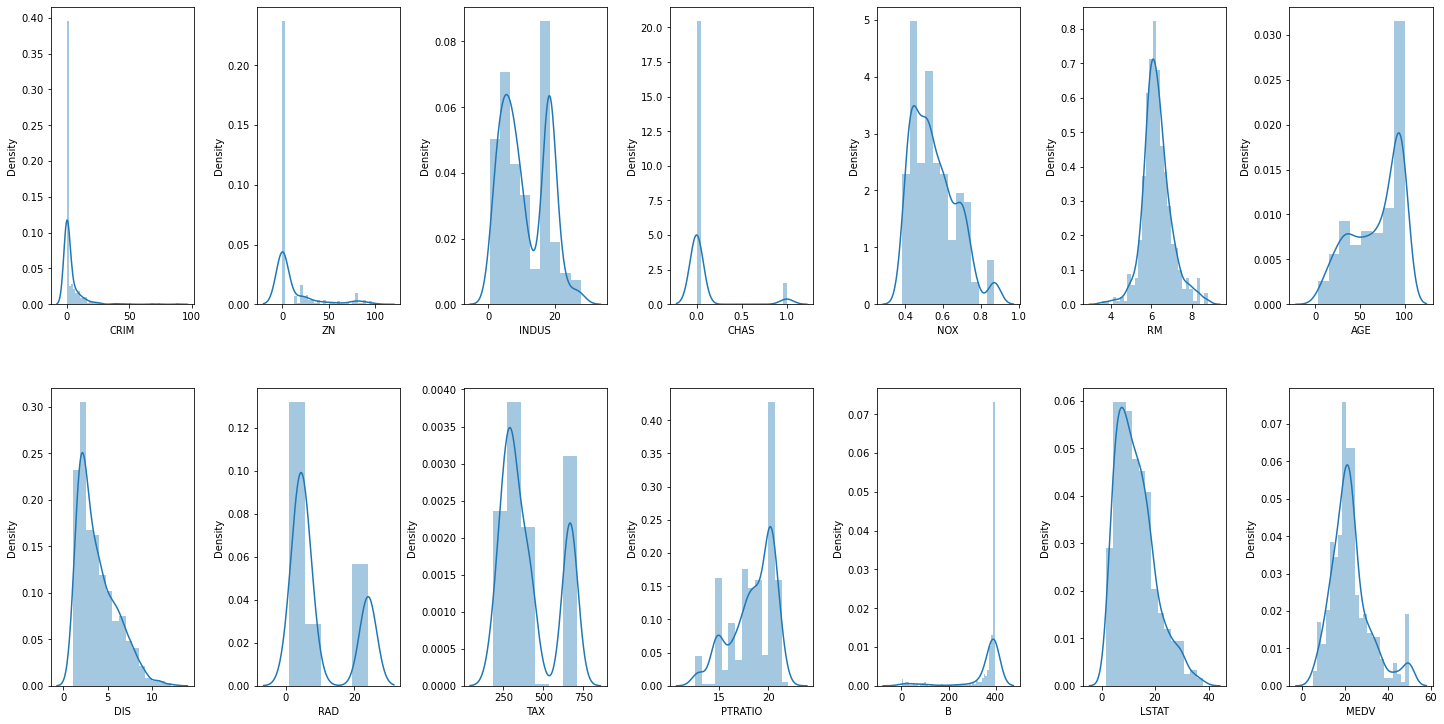

In [7]:
# Create dist plots to get a range
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
# For hyperparameter tuning to avoid overlapping in the graph
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [8]:
# from the plot we observe that values of RM,LSTAT & MEDV are distributed normally with few outliers

## Performing Min-Max Normalization for CRIM, ZN,TAX & B 

### Min Max normalization is performed when ceratin columns have very large ranges and through this normalization we set the range 0 to 1 

In [28]:
cols = ['CRIM', 'ZN', 'TAX', 'B']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

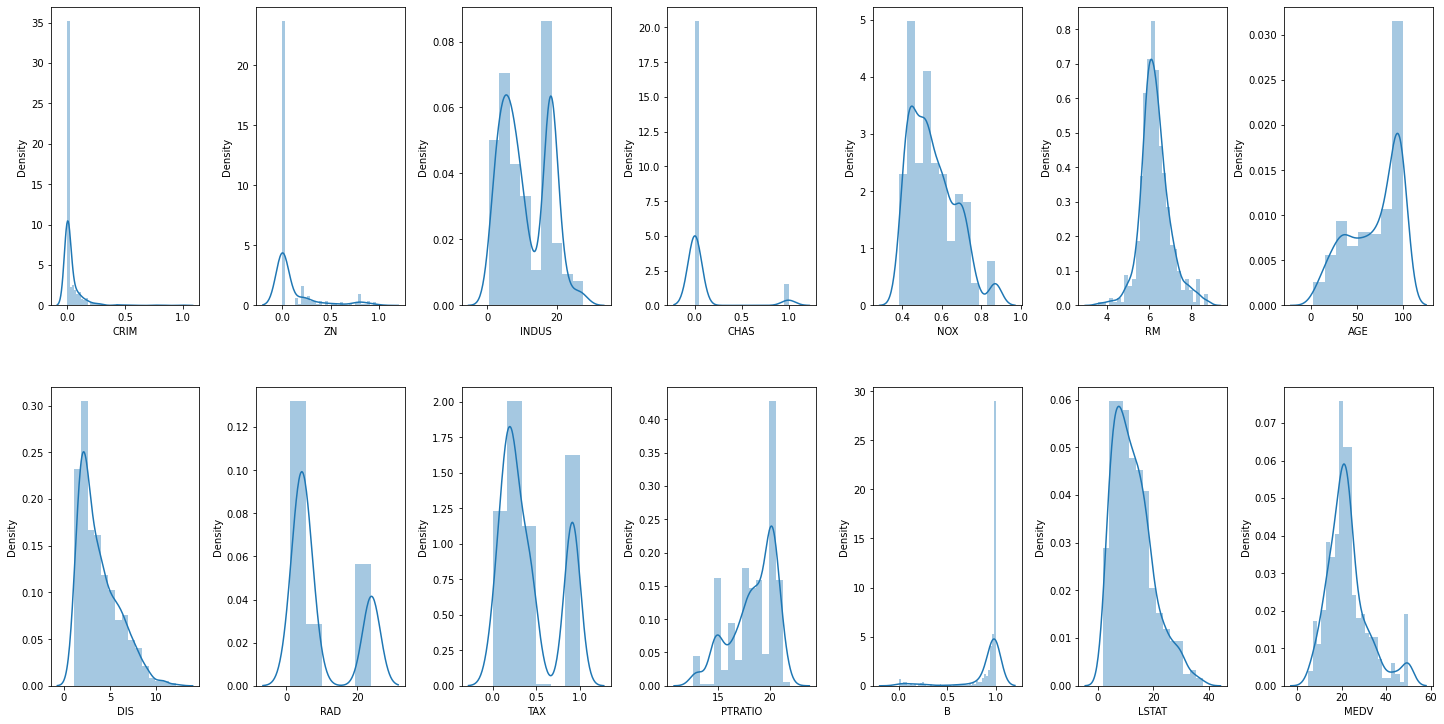

In [29]:
# Create dist plots to get a range
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
# For hyperparameter tuning to avoid overlapping in the graph
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Doing standardization of the above mentioned 4 columns in order to get a uniform distribution model 

In [31]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.413898,0.290525,-0.666608,0.441052
1,-0.411488,-0.479864,-0.987329,0.441052
2,-0.411491,-0.479864,-0.987329,0.396427
3,-0.410908,-0.479864,-1.106115,0.416163
4,-0.406697,-0.479864,-1.106115,0.441052


In [32]:
for col in cols:
    df[col] = scaled_cols[col]

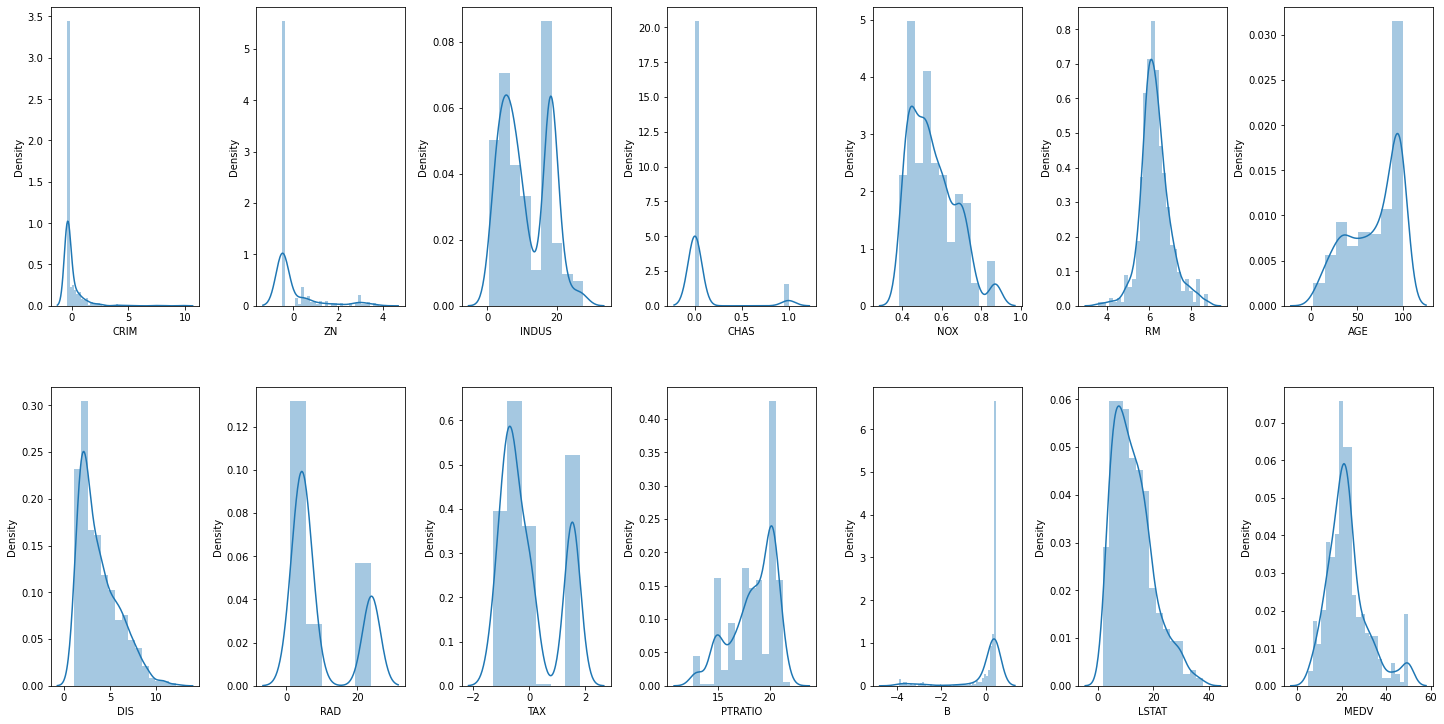

In [33]:
# Create dist plots to get a range
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
# For hyperparameter tuning to avoid overlapping in the graph
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Correlation Matrix 

#### We create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.


<AxesSubplot:>

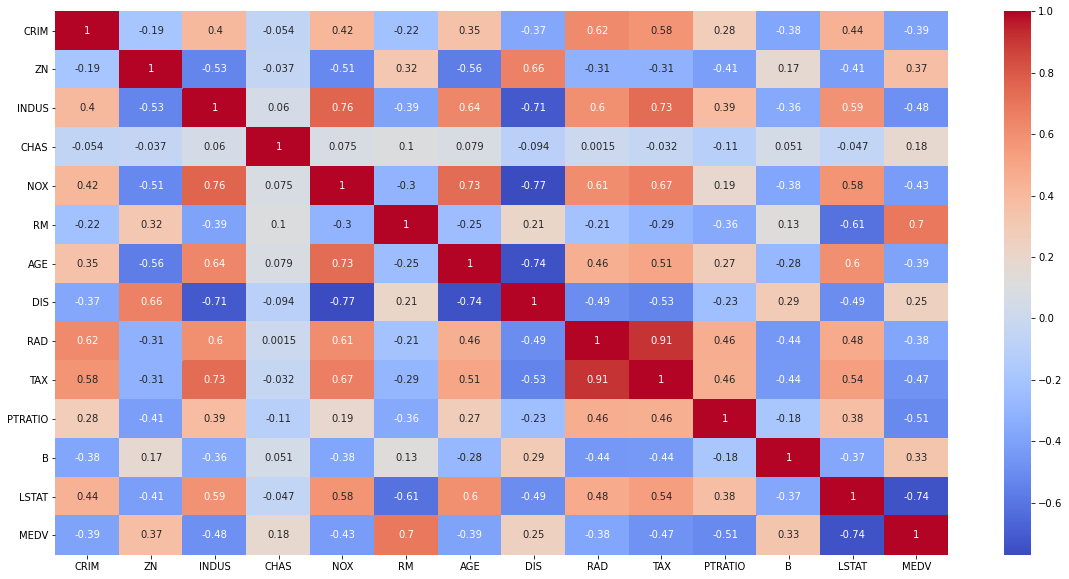

In [34]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

### To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

## Regression Plot

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

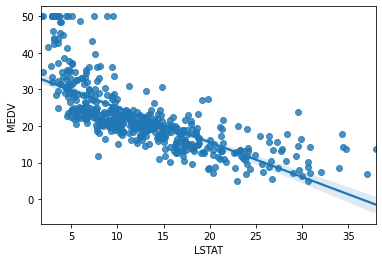

In [35]:
#MEDV v/s LSTAT
sns.regplot(y=df['MEDV'], x=df['LSTAT'])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

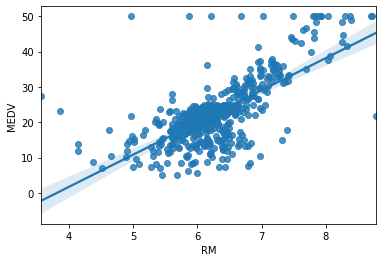

In [36]:
#MEDV v/s RM
sns.regplot(y=df['MEDV'], x=df['RM'])

## Inplut Split

In [40]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

## Model training

#### Split the data into training and testing sets 

In [41]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)
